Here is a link to my source code.

https://github.com/CeceZiegler1/CeceZiegler1.github.io/blob/main/posts/perceptron_notebook/perceptron.py

In [1]:
%load_ext autoreload
%autoreload 2

# Implementation of Perceptron Update

To perform the perceptron update, I used the fit function in my program. I started by computing the dot product of the feature matrix, X, with the weight vector, w, and I stored that result in a variable, dp. I then found my predicted y value by computing the sign of the value stored in dp. From here, I updated the weight value, but the weight will only change if the predicted y value is not equal to the actual y value. If they are different, the weight vector will update. The method is still called on all of the weights, however the weight will remain the same if the predicted y is equal to the actual y. 

# Test Case One: 2D-Linearly Seperable Data

Below, it is shown that the perceptron algorithm converges to 0 with linearly seperable 2D data. It is shown in the graph with the line that the algorithm properly separated the data, and the loss is also printed out, which is zero, meaning the algorithm reached an acuracy of 100%

0.0


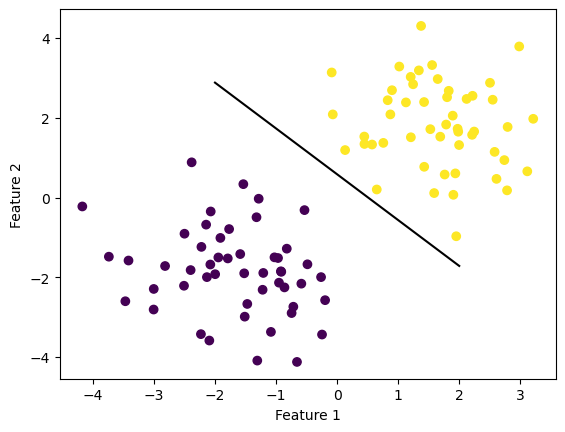

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

from perceptron import Perceptron

#np.random.seed(12345)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])


y = 2*y -1
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)


p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")






## Graph of Change in Accuracy with each Iteration

This graph shows the change in accuracy of the algorithm with each iteration. We can see here that it didn't take the algorithm very long to converge to zero and reach an accuracy of 100%

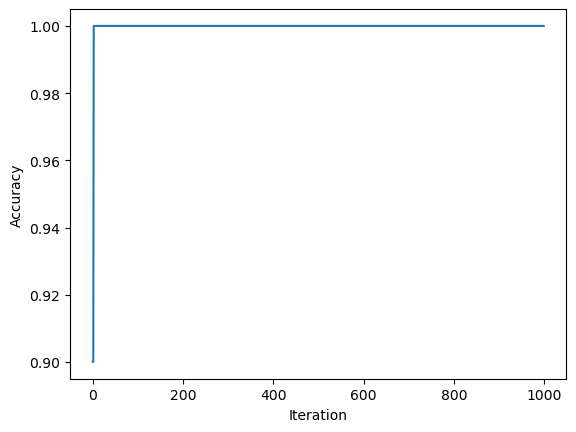

In [4]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")


# Test Case 2: Non-Linearly Seperable Data

As you can see from the graph below, the data is not linearly seperable. Because of this, the perceptron algorithm will never converge to zero. Instead, It will run through the max number of steps and print out the loss and line of fit found at the last iteration

0.6619999999999999


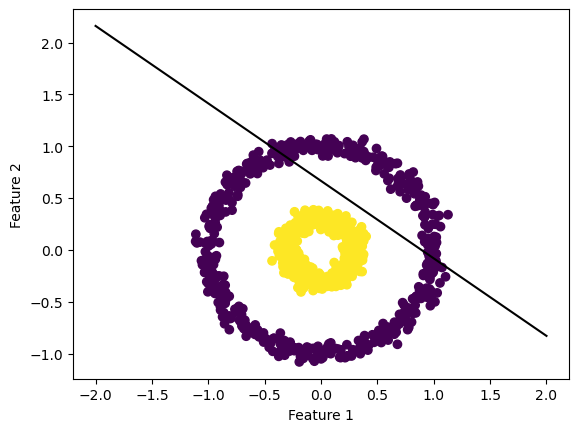

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

y = 2*y -1
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)


p = Perceptron()
p.fit(X, y, max_steps = 1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

## The graph below shows the accuracy over time of non linearly seperable data

We can see from this graph that the accuracy fluctuates a lot with each iteration as the algorithm attempts to accuratley sort out the non-linearly separable data. It is unable to reach an accuracy of 100% with the best accuracy it reached coming at around 60%

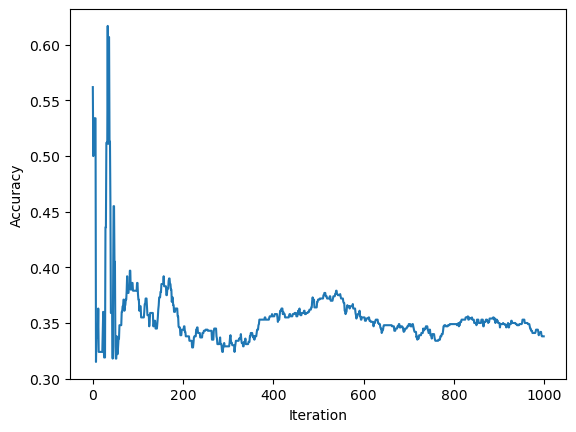

In [6]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")


# Test 3: Data with at least 5 features

Below, the perceptron algorithm is tested on data with 5 features. We can see that the algorithm still works correctly, even with more features, as the algorithm still converges to zero.

In [141]:
n = 100
p_features = 5

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])


y = 2*y -1
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)


p = Perceptron()
p.fit(X, y, max_steps = 1000)

0.0


## Below is a graph of the change in accuracy over time for data with more than 5 features

We can see from this graph, similar to our 2D linearly separable data, the algorithm did not take a long time to converge to zero and reach an accuracy of 100%

0.0


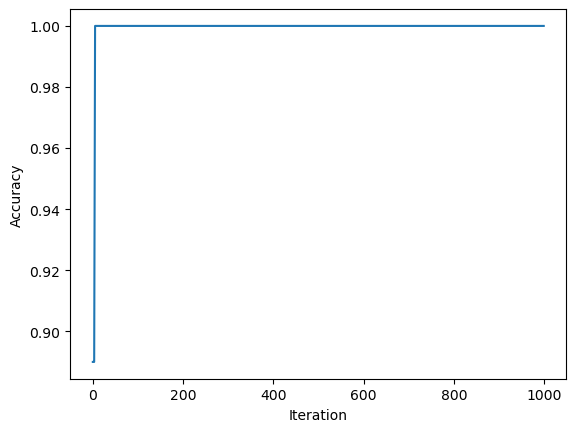

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

from perceptron import Perceptron

#np.random.seed(12345)

n = 100
p_features = 5

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])


y = 2*y -1
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)


p = Perceptron()
p.fit(X, y, max_steps = 1000)

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

# Runtime Complexity!

The runtime complexity of a single iteration of the perceptron algorithm is O(n), meaning it is dependent on the input size, n. During each iteration of the perceptron algorithm, the dot product is computed between the weight vector, and the feature matrix which takes O(n) time, as it is dependent on the number of data point inputs in the matrix, and it must compute the dot product for each data point to check if it is labeled correctly. 